<a href="https://colab.research.google.com/github/igorsoares0/phishing-classifier/blob/main/Projeto_de_detec%C3%A7%C3%A3o_de_phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de URLs suspeitas de phishing

A Internet tornou-se uma parte indispensável da nossa vida, no entanto, também forneceu oportunidades para realizar anonimamente atividades maliciosas como Phishing. Os atacantes tentam enganar suas vítimas por meio de engenharia social ou criando sites fraudulentos para roubar informações como ID da conta, nome de usuário, senha de indivíduos e organizações. 

Embora muitos métodos tenham sido propostos para detectar sites de phishing, os criminosos evoluíram seus métodos para escapar dessas formas de detecção. Um dos métodos mais bem-sucedidos para detectar essas atividades maliciosas é o Machine Learning. Isso ocorre porque a maioria dos ataques de phishing tem algumas características comuns que podem ser identificadas por métodos de aprendizado de máquina.

Os passos desse projeto:

1. Carregar os dados
2. Entender os dados
3. Visualizar os dados
4. Separar os dados
5. Construção dos modelos
6. Avaliar os modelos
7. Conclusão

In [ ]:
#importando as libs necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Carregando os dados:

Existe uma coleção de URLs de sites para mais de 11.000 sites. Cada amostra tem 30 parâmetros de site e um rótulo de classe que o identifica como um site de phishing ou não (1 ou -1).


A visão geral deste conjunto de dados é que ele possui 11.054 amostras com 32 recursos.

In [ ]:
#Carregando os dados

data = pd.read_csv("https://www.dropbox.com/s/nrisxzdp54bolpt/phishing.csv?dl=1")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Entendendo os dados:
Aqui vamos examinar alguns dados do dataset:

In [ ]:
#Shape

data.shape

(11054, 32)

In [ ]:
#Lista de features do dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
#Informações do dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
#Valores únicos por colunas

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [ ]:
#Dropando a coluna index 

data = data.drop(['Index'],axis = 1)

In [ ]:
#Descrição do dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


Observações:
1. Existem 11.054 instâncias e 31 recursos no conjunto de dados.
2. Não há outlier presente no conjunto de dados.
3. Não há valor ausente no conjunto de dados.

## 3. Visualização de dados:
Alguns gráficos exibidos para descobrir como os dados são distribuídos e como os recursos estão relacionados entre si.

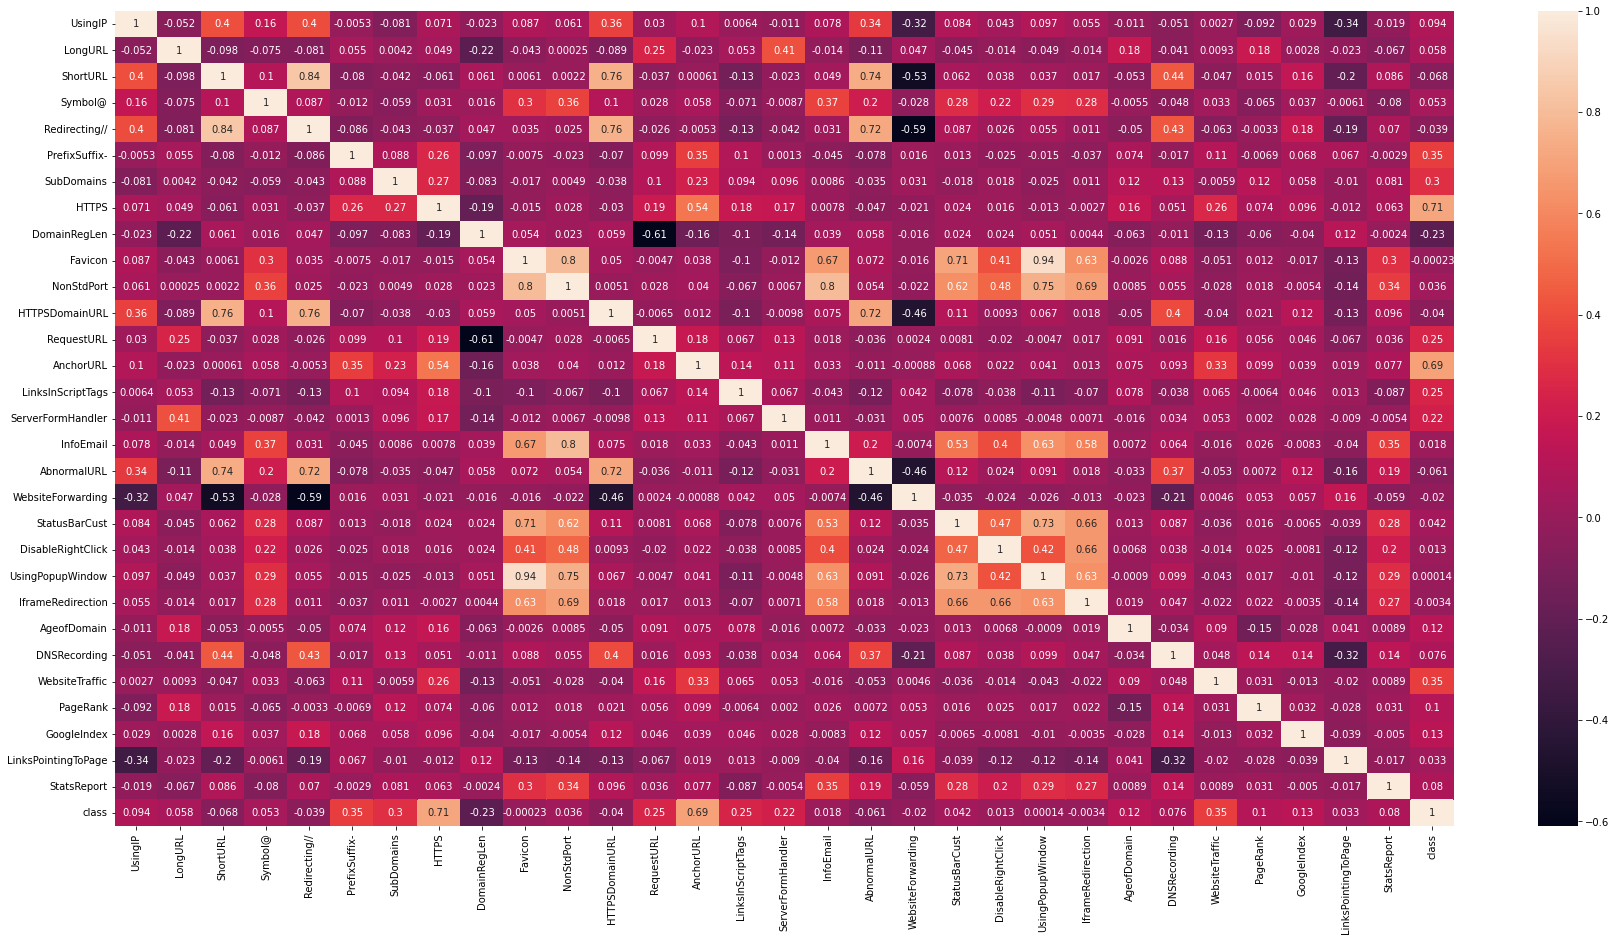

In [ ]:
#Correlation heatmap

plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

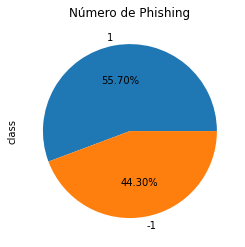

In [ ]:
# Phishing pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Número de Phishing")
plt.show()

## 4. Separar os dados:
Aqui vamos separar os dados de treino e teste - 80-20, respectivamente.

In [ ]:
# Dividindo o conjunto de dados em variáveis dependentes e independentes.

X = data.drop(["class"],axis =1)
y = data["class"]

In [ ]:
# Dividindo o dataset em conjuntos de treinamento e teste: divisão de 80-20.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Construção dos modelos:
O aprendizado supervisionado é um dos tipos de aprendizagem de máquina mais usados. O aprendizado supervisionado é usado sempre que queremos prever um resultado/rótulo de um determinado conjunto de recursos, e temos exemplos de pares recursos-rótulo. Construíremos um modelo de aprendizado de máquina a partir desses conjuntos de rótulos, que compõem nossos dados de treinamento. Nosso objetivo é fazer previsões precisas para dados nunca antes vistos.

Existem dois tipos principais de problemas de aprendizado de máquina supervisionados, chamados de classificação e regressão. Aqui serão abordados modelos de classificação, são eles:

1. Regressão Logística
2. k-Nearest Neighbors(KNN) 
3. Support Vector Machine(SVM)
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. Xgboost
8. Multilayer Perceptrons

              
As métricas consideradas para avaliar o desempenho do modelo serão accuracy e F1 score.

In [ ]:
# Armazenar os resultados de desempenho dos modelos
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#Função de chamada para armazenar os resultados
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Regressão Logística

A regressão logística prevê a saída de uma variável dependente categórica. Portanto, o resultado deve ser um valor categórico ou discreto. A Regressão Logística é muito semelhante à Regressão Linear, exceto pela forma como são usadas. A regressão linear é usada para resolver problemas de regressão, enquanto a regressão logística é usada para resolver os problemas de classificação.

In [ ]:
# Modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# Instanciando modelo
log = LogisticRegression()

# Fit do modelo 
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Regressão Logística : Accuracy nos dados de treino: {:.3f}".format(acc_train_log))
print("Regressão Logística : Accuracy nos dados de teste: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Regressão Logística : f1_score nos dados de treino: {:.3f}".format(f1_score_train_log))
print("Regressão Logística : f1_score nos dados de teste: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Regressão Logística : Recall nos dados de treino: {:.3f}".format(recall_score_train_log))
print("Regressão Logística : Recall nos dados de teste: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Regressão Logística : precision nos dados de treino: {:.3f}".format(precision_score_train_log))
print("Regressão Logística : precision nos dados de teste: {:.3f}".format(precision_score_test_log))

Regressão Logística : Accuracy nos dados de treino: 0.927
Regressão Logística : Accuracy nos dados de teste: 0.934

Regressão Logística : f1_score nos dados de treino: 0.935
Regressão Logística : f1_score nos dados de teste: 0.941

Regressão Logística : Recall nos dados de treino: 0.943
Regressão Logística : Recall nos dados de teste: 0.953

Regressão Logística : precision nos dados de treino: 0.927
Regressão Logística : precision nos dados de teste: 0.930


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors(KNN)

O KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.

In [ ]:
# K-Nearest Neighbors Classifier 
from sklearn.neighbors import KNeighborsClassifier

# instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=1)

# fit do modelo 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy nos dados de treino: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy nos dados de teste: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score nos dados de treino: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score nos dados de teste: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall nos dados de treino: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall nos dados de teste: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision nos dados de treino: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision nos dados de teste: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy nos dados de treino: 0.989
K-Nearest Neighbors : Accuracy nos dados de teste: 0.956

K-Nearest Neighbors : f1_score nos dados de treino: 0.990
K-Nearest Neighbors : f1_score nos dados de teste: 0.961

K-Nearest Neighborsn : Recall nos dados de treino: 0.991
Logistic Regression : Recall nos dados de teste: 0.962

K-Nearest Neighbors : precision nos dados de treino: 0.989
K-Nearest Neighbors : precision nos dados de teste: 0.960


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



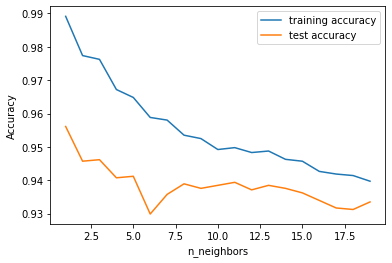

In [ ]:
training_accuracy = []
test_accuracy = []
# tentar max_depth de 1 até 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # salvar a accuracy do conjunto de treino
    training_accuracy.append(knn.score(X_train, y_train))
    # salvar a accuracy da generalização 
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotar a accuracy de treino e teste para n_estimadores de 1 a 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine(SVM)

Support Vector Machine ou SVM é um dos algoritmos de Aprendizado Supervisionado mais populares, usado para problemas de Classificação e Regressão. O objetivo do algoritmo SVM é criar a melhor linha ou limite de decisão que possa segregar o espaço n-dimensional em classes para que possamos facilmente colocar o novo ponto de dados na categoria correta no futuro.

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# definindo o intervalo dos parâmetros
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting do modelo para grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy nos dados de treino: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy nos dados de teste: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score nos dados de treino: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score nos dados de teste: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall nos dados de treino: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall nos dados de teste: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision nos dados de treino: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision nos dados de teste: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy nos dados de treino: 0.969
Support Vector Machine : Accuracy nos dados de teste: 0.964

Support Vector Machine : f1_score nos dados de treino: 0.973
Support Vector Machine : f1_score nos dados de teste: 0.968

Support Vector Machine : Recall nos dados de treino: 0.980
Support Vector Machine : Recall nos dados de teste: 0.980

Support Vector Machine : precision nos dados de treino: 0.965
Support Vector Machine : precision nos dados de teste: 0.957


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [ ]:
##armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Decision Trees

Como o próprio nome sugere, neste algoritmo vários pontos de decisão serão criados. Estes pontos são os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Os caminhos existentes são os “ramos”.

Esta é a estrutura básica de uma árvore de decisão. Os nós são responsáveis pelas conferências que irão indicar um ramo ou outro para sequência do fluxo.

In [ ]:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier

# instanciando o modelo
tree = DecisionTreeClassifier(max_depth=30)

# fit do modelo 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras


y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy nos dados de treino: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy nos dados de teste: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score nos dados de treino: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score nos dados de teste: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall nos dados de treino: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall nos dados de teste: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision nos dados de treino: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision nos dados de teste: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy nos dados de treino: 0.991
Decision Tree : Accuracy nos dados de teste: 0.959

Decision Tree : f1_score nos dados de treino: 0.992
Decision Tree : f1_score nos dados de teste: 0.964

Decision Tree : Recall nos dados de treino: 0.991
Decision Tree : Recall nos dados de teste: 0.963

Decision Tree : precision nos dados de treino: 0.993
Decision Tree : precision nos dados de teste: 0.964


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



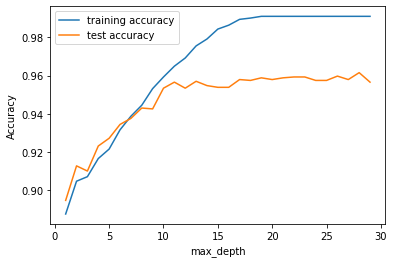

In [ ]:
training_accuracy = []
test_accuracy = []

#tentar max_depth de 1 até 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # salvar a accuracy do conjunto de treino
    training_accuracy.append(tree_test.score(X_train, y_train))
    # salvar a accuracy da generalização
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotar a accuracy de treino e teste para n_estimadores de 1 a 30

plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.5. Random Forest



Em português, Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo.

Em resumo, o Random Forest irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação.


In [ ]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo
forest = RandomForestClassifier(n_estimators=10)

# fit do modelo 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy nos dados de treino: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy nos dados de teste: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score nos dados de treino: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score nos dados de teste: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall nos dados de treino: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall nos dados de teste: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision nos dados de treino: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision nos dados de teste: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy nos dados de treino: 0.990
Random Forest : Accuracy nos dados de teste: 0.969

Random Forest : f1_score nos dados de treino: 0.991
Random Forest : f1_score nos dados de teste: 0.973

Random Forest : Recall nos dados de treino: 0.992
Random Forest : Recall nos dados de teste: 0.976

Random Forest : precision nos dados de treino: 0.990
Random Forest : precision nos dados de teste: 0.964


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



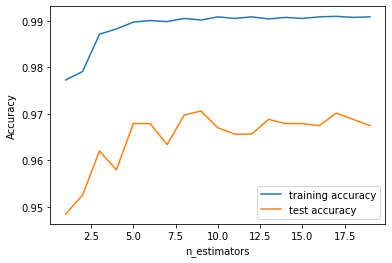

In [ ]:
training_accuracy = []
test_accuracy = []
# tentar max_depth de 1 até 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # salvar a accuracy do conjunto de treino
    training_accuracy.append(forest_test.score(X_train, y_train))
    # salvar a accuracy da generalização
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotar a accuracy de treino e teste para n_estimadores de 1 a 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.6.Gradient Boosting 
O algoritmo Gradient Boosting é um técnica Boosting, incluída dentro do grupo de classificadores Ensemble. Esses classificadores são métodos que utilizam uma combinação de resultados de preditores fracos, com o objetivo de produzir um melhor modelo preditivo. Os preditores fracos são modelos que, quando utilizados individualmente possuem uma acurácia abaixo do esperado. 

In [ ]:
# Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier

# instaciando o modelo
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit do modelo 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy nos dados de treino: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy nos dados de teste: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score nos dados de treino: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score nos dados de teste: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall nos dados de treino: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall nos dados de teste: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision nos dados de treino: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision nos dados de teste: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy nos dados de treino: 0.989
Gradient Boosting Classifier : Accuracy nos dados de teste: 0.974

Gradient Boosting Classifier : f1_score nos dados de treino: 0.990
Gradient Boosting Classifier : f1_score nos dados de teste: 0.977

Gradient Boosting Classifier : Recall nos dados de treino: 0.994
Gradient Boosting Classifier : Recall nos dados de teste: 0.989

Gradient Boosting Classifier : precision nos dados de treino: 0.986
Gradient Boosting Classifier : precision nos dados de teste: 0.966


In [ ]:
#computando o relatório de classificação do modelo

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



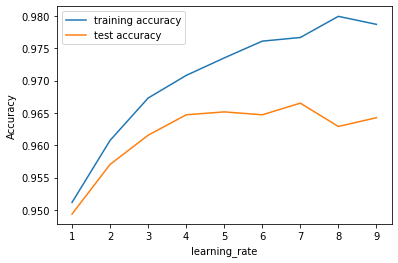

In [ ]:
training_accuracy = []
test_accuracy = []

#tentar learning_rate de 0.1 até 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # salvar a accuracy do conjunto de treino
    training_accuracy.append(forest_test.score(X_train, y_train))
    # salvar a accuracy da generalização
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotar a accuracy de treino e teste para n_estimadores de 1 a 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

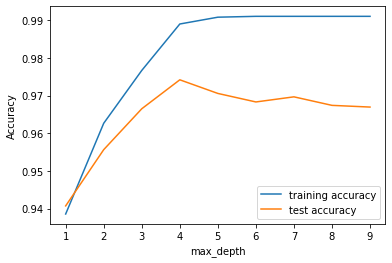

In [ ]:
training_accuracy = []
test_accuracy = []

#tentar learning_rate de 0.1 até 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # salvar a accuracy do conjunto de treino
    training_accuracy.append(forest_test.score(X_train, y_train))
    # salvar a accuracy da generalização
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotar a accuracy de treino e teste para n_estimadores de 1 a 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.7. XGBoost 

O nome XGBoost vem de eX*treme *Gradient Boosting, e representa uma categoria de algoritmo baseada em Decision Trees (árvores de decisão) com Gradient Boosting (aumento de gradiente).

Aumento de gradiente significa que o algoritmo usa o algoritmo Gradient Descent para minimizar a perda (loss) enquanto novos modelos vão sendo adicionados.

Extremamente flexível – uma vez que possui um grande número de hiperparâmetros passíveis de aperfeiçoamento -, você consegue ajustar adequadamente o XGBoost para o cenário do seu problema, seja ele qual for.

In [ ]:
#  XGBoost Classifier 
from xgboost import XGBClassifier

# instanciando o modelo
xgb = XGBClassifier()

# fit do modelo 
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy nos dados de treino: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy nos dados de teste: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score nos dados de treino: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score nos dados de teste: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall nos dados de treino: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall nos dados de teste: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision nos dados de treino: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision nos dados de teste: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy nos dados de treino: 0.952
XGBoost Classifier : Accuracy nos dados de teste: 0.952

XGBoost Classifier : f1_score nos dados de treino: 0.957
XGBoost Classifier : f1_score nos dados de teste: 0.958

XGBoost Classifier : Recall nos dados de treino: 0.968
XGBoost Classifier : Recall nos dados de teste: 0.968

XGBoost Classifier : precision nos dados de treino: 0.947
XGBoost Classifier : precision nos dados de teste: 0.947


In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.8. Multi-layer Perceptron

Perceptron Multicamadas (PMC ou MLP — Multi Layer Perceptron) é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios. A camada oculta possui esse nome porque não é possível prever a saída desejada nas camadas intermediárias.

Para treinar a rede MLP, o algoritmo comumente utilizado é o de retropropagação (Backpropagation)


In [ ]:
# Multi-layer Perceptron Classifier 
from sklearn.neural_network import MLPClassifier

# instanciando o modelo
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit do modelo 
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
#previsão do valor alvo a partir do modelo para as amostras
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computando o accuracy, f1_score, Recall, precision do modelo

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy nos dados de treino: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy nos dados de teste: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score nos dados de treino: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score nos dados de teste: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall nos dados de treino: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall nos dados de teste: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision nos dados de treino: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision nos dados de teste: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy nos dados de treino: 0.987
Multi-layer Perceptron : Accuracy nos dados de teste: 0.970

Multi-layer Perceptron : f1_score nos dados de treino: 0.988
Multi-layer Perceptron : f1_score nos dados de teste: 0.988

Multi-layer Perceptron : Recall nos dados de treino: 0.987
Multi-layer Perceptron : Recall nos dados de teste: 0.978

Multi-layer Perceptron : precision nos dados de treino: 0.989
Multi-layer Perceptron : precision nos dados de teste: 0.969


In [ ]:
#armazenando os resultados. A ordem de passagem de parâmetros codificada abaixo é importante.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Avaliando os modelos
Para comparar o desempenho dos modelos, foi criado um dataframe. As colunas deste dataframe são as listas criadas para armazenar os resultados do modelo.

In [ ]:
#criando o dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
# mostrando os resultados
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Decision Tree,0.958,0.963,0.991,0.993
4,Random Forest,0.971,0.974,0.990,0.993
5,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
6,XGBoost Classifier,0.952,0.958,0.968,0.947
7,Multi-layer Perceptron,0.970,0.973,0.987,0.989


In [ ]:
#Ordenando o dataframe baseado no accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
#mostrando o resultado
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,Random Forest,0.971,0.974,0.990,0.993
2,Multi-layer Perceptron,0.970,0.973,0.987,0.989
3,Support Vector Machine,0.964,0.968,0.980,0.965
4,Decision Tree,0.958,0.963,0.991,0.993
5,K-Nearest Neighbors,0.956,0.961,0.991,0.989
6,XGBoost Classifier,0.952,0.958,0.968,0.947
7,Logistic Regression,0.934,0.941,0.943,0.927


## Salvando o melhor modelo

In [ ]:
# instanciando o modelo
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit do modelo 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
import pickle

# salvando o modelo com pickle
pickle.dump(gbc, open('model.pkl', 'wb'))

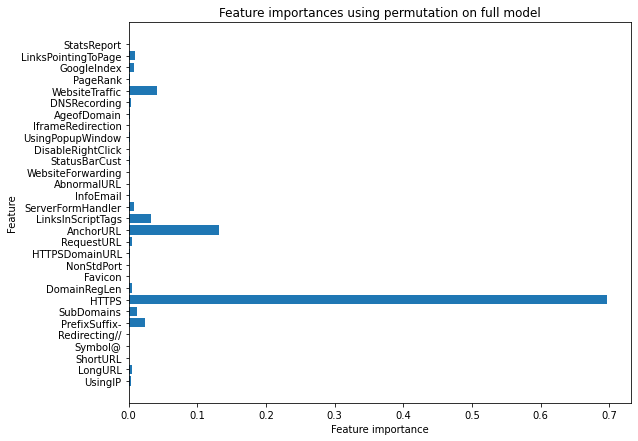

In [ ]:
#checando a importância de cada feature
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusão

1. O resultado final deste projeto é explorar vários modelos de aprendizagem de máquinas, realizar Análise Exploratória de Dados sobre conjunto de dados de phishing e compreender suas características. 
2. A criação deste projeto me ajudou a aprender muito sobre as características que afetam os modelos para detectar se a URL é segura ou não, também aprendi como ajustar o modelo e como eles afetam o desempenho do modelo.

